<a href="https://colab.research.google.com/github/liznjoki/Data-Science-Projects/blob/main/MedicalCostDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Medical Cost Prediction Analysis
###Can we accurately predict medical costs based on people's data?
###The datasource is from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance


###Import All the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

###Clean and Prepare the Data for Analysis
1. Load the CSV into pandas
2. Look at basic values in the columns in the data
3. Check for any missing values in the data


In [ ]:
data= pd.read_csv("insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

##Exploratory Data Analysis
###Analyze Charges based on:
1. Age
2. Sex
3. Bmi
4. Children
5. Smoker
6. Region


IndexError: ignored

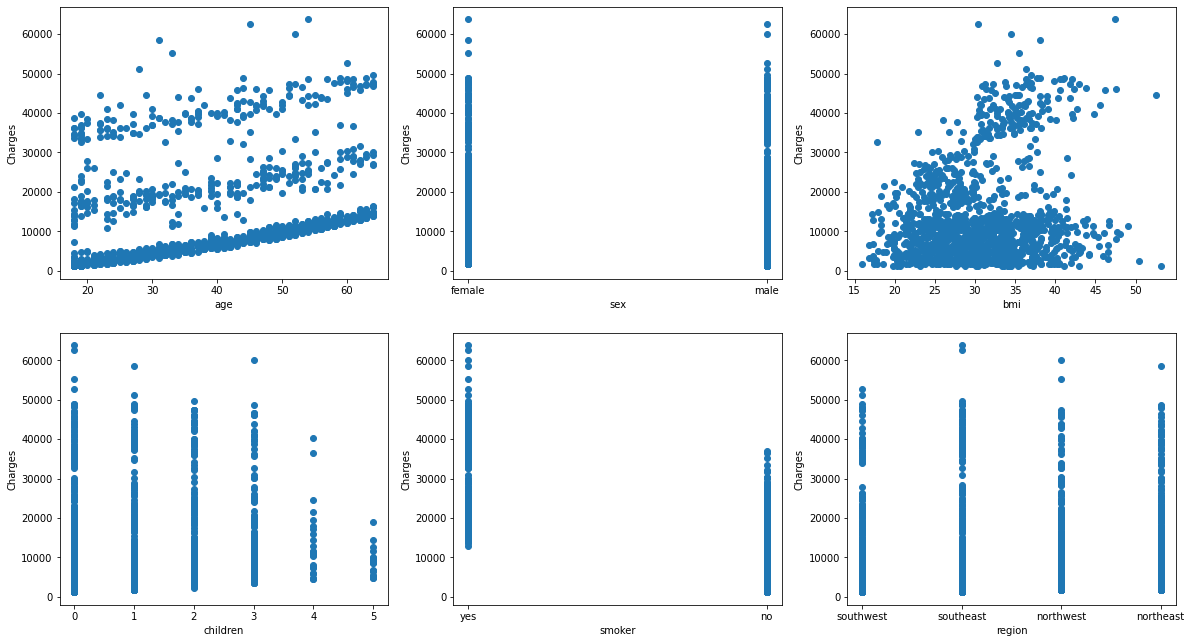

In [ ]:
#scatter plot of each category against the charge
fig , axes = plt.subplots(2,3, figsize=(20,11))
for i, j in list(enumerate(data.columns)):
  axes[i//3][i%3].set_xlabel(j)
  axes[i//3][i%3].set_ylabel("Charges")
  axes[i//3][i%3].scatter(data[j], data['charges'], cmap="magma")
  plt.tight_layout

###Key Insights
1. Medical Charges do increase with an increase in age as expected
2.There is no significant difference in the medical cost based on sex
3. BMI may not be a significant detector of price
4. Medical costs decrease with the number of children.. *Interesting observation
5. Smokers pay more medical costs
6. Generally no correlation between cost and region

#Co-relation Matrix


In [ ]:
from sklearn.preprocessing import LabelEncoder
##Change categorical variables into numerical variables
le= LabelEncoder()
data["smoker"] = le.fit_transform(data["smoker"])
data["region"] = le.fit_transform(data["region"])
data["sex"] = le.fit_transform(data["sex"])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


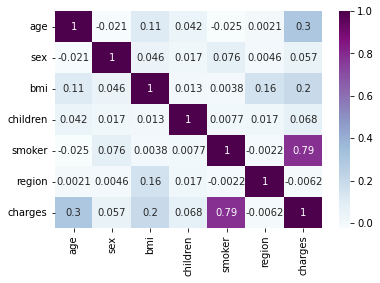

In [ ]:
sns.heatmap(data.corr(), cmap="BuPu", annot=True)

In [ ]:
#Insights

###Insights
1. Smoking status has the highest correlation to charges.
2. Age and BMI have a slight correlation to charges

All the other factors have no correlation

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

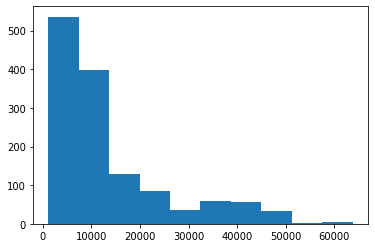

In [ ]:
plt.hist(data["charges"])
#Majority of the medical costs range between 2,000 and 25,000

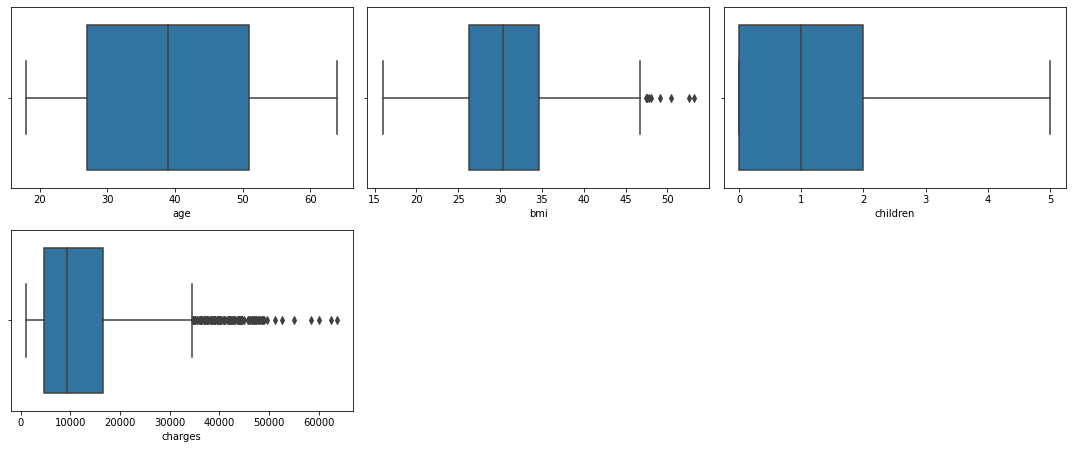

In [ ]:
cols = 3
rows = 3
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=data[col], ax=ax)
    
fig.tight_layout()  
plt.show()
#A number of outliers in bmi and charges

In [ ]:
#There are quite a number of outliers in charges. However this could be due to a particular reason


#Data Modelling

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

data_pre = data.copy()
tempBMI= data_pre.bmi.values.reshape(-1,1)
data_pre.bmi = scaler.fit_transform(tempBMI)
tempAge= data_pre.age.values.reshape(-1,1)
data_pre.age= scaler.fit_transform(tempAge)
tempCharges= data_pre.charges.values.reshape(-1,1)
data_pre.charges = scaler.fit_transform(tempCharges)
data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,0.298584
1,-1.509965,1,0.509621,1,0,2,-0.953689
2,-0.797954,1,0.383307,3,0,2,-0.728675
3,-0.441948,1,-1.305531,0,0,1,0.719843
4,-0.513149,1,-0.292556,0,0,1,-0.776802


In [ ]:
X = data_pre.drop("charges", axis=1)
y= data_pre.charges

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (896, 6)
Size of y_train :  (896,)
Size of X_test :  (442, 6)
Size of Y_test :  (442,)


In [ ]:
#Creating the Model
#Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
predictions= lr.predict(X_test)
r2_score(predictions, y_test)

0.6833378580496491